In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [46]:
%cd /content/drive/MyDrive/Churn

/content/drive/MyDrive/Churn


In [47]:
df = pd.read_csv("Churn_Modelling.csv")

In [48]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [49]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [50]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [51]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


#Initial Visuals


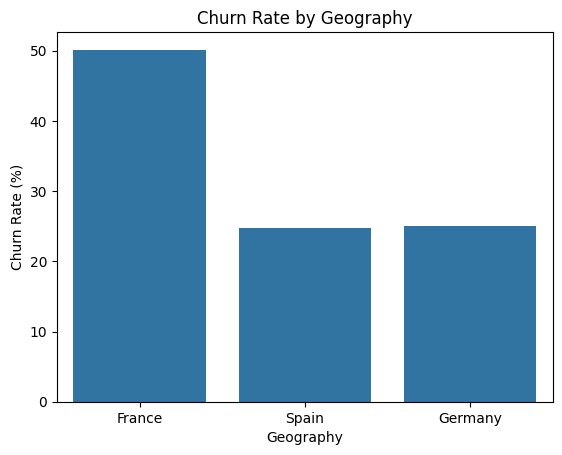

In [52]:
sns.barplot(x='Geography', y='Exited', data=df, estimator=lambda x: len(x) / len(df) * 100)
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Geography')
plt.show()


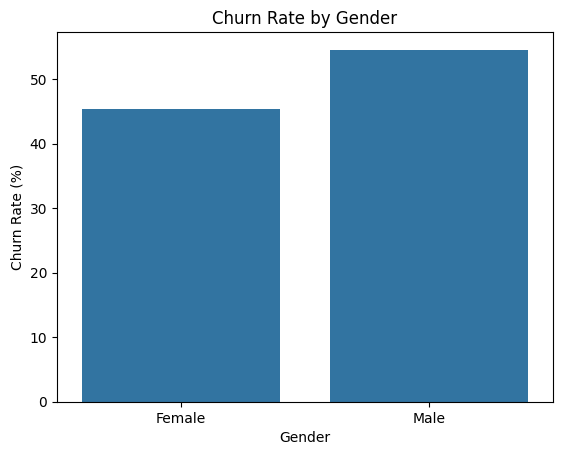

In [53]:
sns.barplot(x='Gender', y='Exited', data=df, estimator=lambda x: len(x) / len(df) * 100)
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Gender')
plt.show()


<Axes: xlabel='Age', ylabel='Percent'>

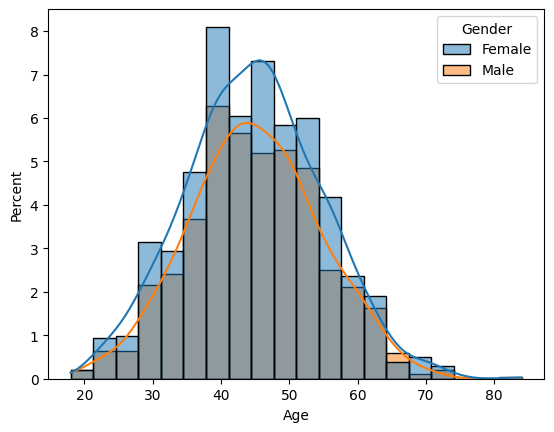

In [54]:
sns.histplot(df[(df['Exited']==1)], x='Age', hue='Gender', bins=20, stat='percent', kde='True')

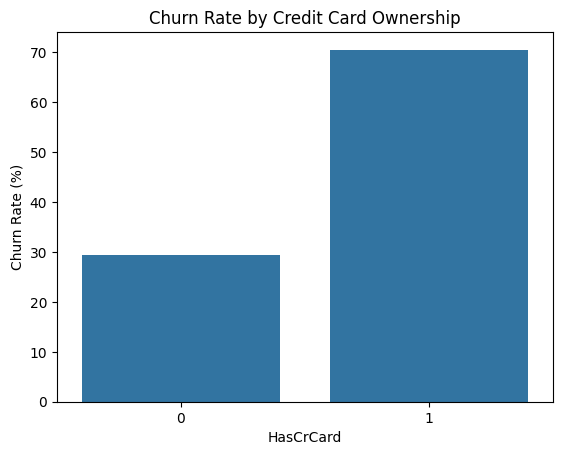

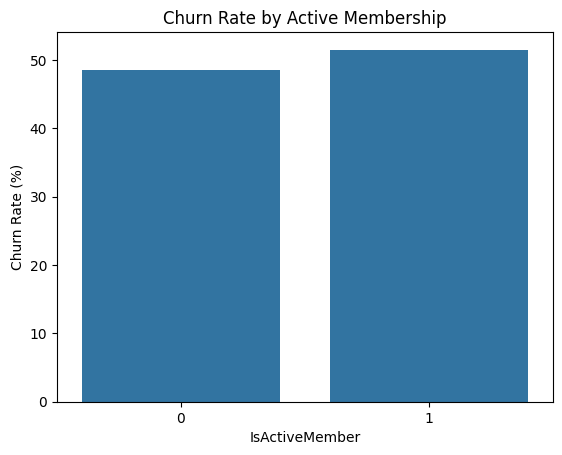

In [55]:
sns.barplot(x='HasCrCard', y='Exited', data=df, estimator=lambda x: len(x) / len(df) * 100)
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Credit Card Ownership')
plt.show()

sns.barplot(x='IsActiveMember', y='Exited', data=df, estimator=lambda x: len(x) / len(df) * 100)
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Active Membership')
plt.show()


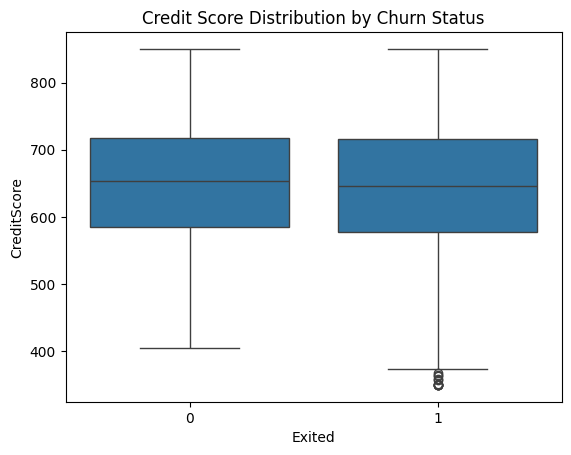

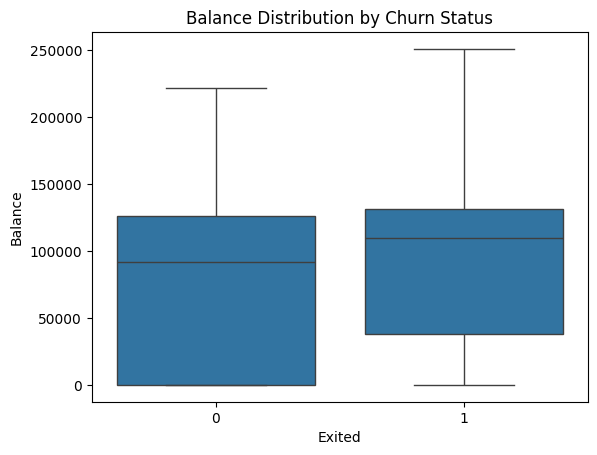

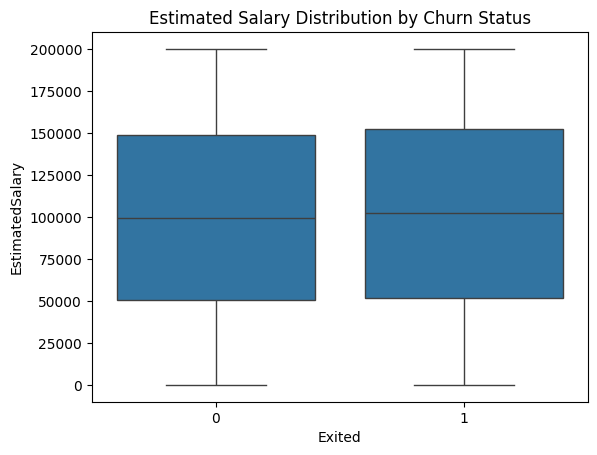

In [56]:
sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.title('Credit Score Distribution by Churn Status')
plt.show()

sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Balance Distribution by Churn Status')
plt.show()

sns.boxplot(x='Exited', y='EstimatedSalary', data=df)
plt.title('Estimated Salary Distribution by Churn Status')
plt.show()


In [57]:
#sns.pairplot(df, hue='Exited', vars=['Age', 'CreditScore', 'Balance', 'EstimatedSalary'])
#plt.show()


#Pre-processing

In [58]:

df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
label_encoder = LabelEncoder()



In [59]:
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Geography'], drop_first=True, dtype= np.number)

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/common.py:1636: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)


In [60]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0


In [61]:
X=df.drop('Exited', axis=1)
y=df['Exited']

# Test Train

In [62]:
x_test, x_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale / Standardise


In [63]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [64]:
x_train[:5], x_test[:5]

(array([[-0.51250172,  0.90911166, -0.67729931, -0.69844549,  0.30084641,
          0.80510537, -1.57810057, -1.0502616 , -0.99096946,  1.73668197,
         -0.56349184],
        [-0.2360466 ,  0.90911166,  0.38429835, -1.38035469, -1.25599716,
          0.80510537,  0.63367318,  0.95214374,  0.8293793 , -0.57581067,
         -0.56349184],
        [-0.46130633, -1.09997489,  0.48080723, -0.3574909 , -1.25599716,
          0.80510537,  0.63367318, -1.0502616 , -0.69904548, -0.57581067,
          1.77464858],
        [-1.43401879,  0.90911166,  1.92844041,  1.0063275 ,  0.66213917,
          0.80510537,  0.63367318,  0.95214374,  1.25231536,  1.73668197,
         -0.56349184],
        [-0.88110855, -1.09997489, -1.1598437 ,  0.6653729 ,  0.75621521,
         -0.89163935,  0.63367318,  0.95214374,  0.27749237, -0.57581067,
          1.77464858]]),
 array([[ 0.40901535,  0.90911166, -0.67729931,  0.3244183 , -1.25599716,
          0.80510537,  0.63367318,  0.95214374,  1.39874814, -0.57581

# Fit the model, Random Forest

In [65]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [66]:
y_pred = model.predict(x_test)

In [67]:
#Confusion matrix

conf_matrix  = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [68]:
print(conf_matrix)
print(class_report)
print(accuracy)

[[6148  208]
 [ 930  714]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6356
           1       0.77      0.43      0.56      1644

    accuracy                           0.86      8000
   macro avg       0.82      0.70      0.74      8000
weighted avg       0.85      0.86      0.84      8000

0.85775


In [69]:
# 0 - didnt churn -
# Precision  - prediction correct for 87% of positive predictions (true positive prediction count /true positive + false positive)
# Recall - prediction correct for 97% of all positive predicitons (true positive/true positive + false negative)
# F1 - Score balanced score from above.

# 1 did churn

# precision - mid score could be improved by parameter tuning
# recall - poor score, high number of type 2 false negatives

#Accuracy is correct True pos + True neg / all predicitions

# Feature Importance

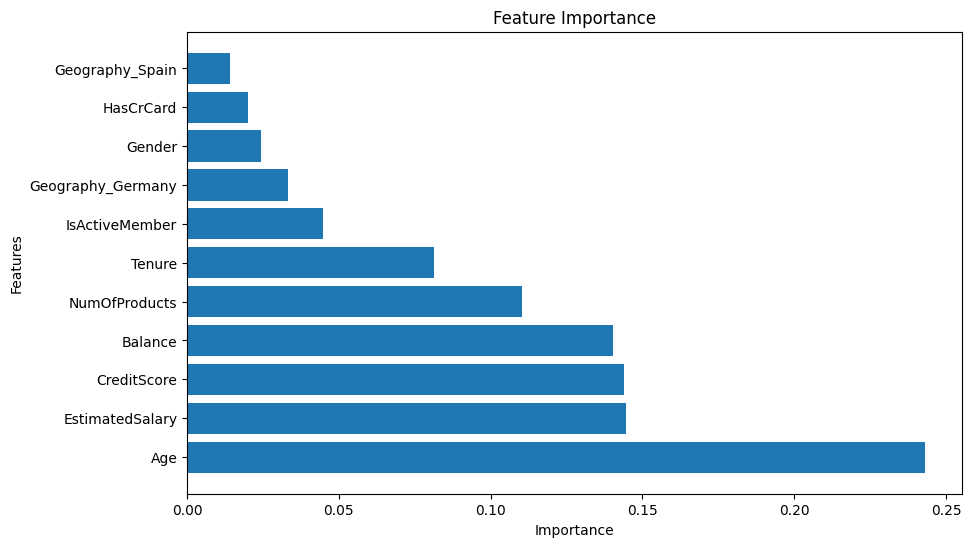

In [70]:
importance = model.feature_importances_
indices = np.argsort(importance)[::-1] # sorts in descending order
feature_names = [X.columns[i] for i in indices] # Gets the feature names

plt.figure(figsize=(10, 6))
plt.barh(range(X.shape[1]), importance[indices])
plt.yticks(range(X.shape[1]), feature_names)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

# Compare with logistic regression

In [71]:
#Train Model

log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train, y_train)




LogisticRegression(random_state=42)

In [72]:
# Make Predicitons

y_pred_log = log_reg.predict(x_test)

In [73]:
#Evaluate

conf_matrix_log  = confusion_matrix(y_test, y_pred_log)
class_report_log = classification_report(y_test, y_pred_log)
accuracy_log = accuracy_score(y_test, y_pred_log)

print(conf_matrix_log)
print(class_report_log)
print(accuracy_log)

[[6105  251]
 [1281  363]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6356
           1       0.59      0.22      0.32      1644

    accuracy                           0.81      8000
   macro avg       0.71      0.59      0.61      8000
weighted avg       0.78      0.81      0.77      8000

0.8085


# Compare with Support Vector Machines (SVM / SVC)



In [74]:
from sklearn.svm import SVC

#Build model

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_train, y_train)

# make predictions

y_pred_svm = svm_model.predict(x_test)

# Eval model

conf_matrix_svm  = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(conf_matrix_svm)
print(class_report_svm)
print(accuracy_svm)

[[6356    0]
 [1644    0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.89      6356
           1       0.00      0.00      0.00      1644

    accuracy                           0.79      8000
   macro avg       0.40      0.50      0.44      8000
weighted avg       0.63      0.79      0.70      8000

0.7945


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Compare KNN

In [75]:
# Build and train

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

# Make predictions

y_pred_knn = knn_model.predict(x_test)

# Evaluate

conf_matrix_knn  = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

In [76]:
print(conf_matrix_knn, class_report_knn, accuracy_knn)

[[6064  292]
 [1141  503]]               precision    recall  f1-score   support

           0       0.84      0.95      0.89      6356
           1       0.63      0.31      0.41      1644

    accuracy                           0.82      8000
   macro avg       0.74      0.63      0.65      8000
weighted avg       0.80      0.82      0.80      8000
 0.820875


In [77]:
# Better than others, Random forest still in the lead

# Gradient boosting model

In [78]:
# Build and train

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(x_train, y_train)

# Make predictions

y_pred_gb = gb_model.predict(x_test)


# Evaluate

conf_matrix_gb  = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)
accuracy_gb = accuracy

#print

print(conf_matrix_gb, class_report_gb, accuracy_gb)

[[6129  227]
 [ 908  736]]               precision    recall  f1-score   support

           0       0.87      0.96      0.92      6356
           1       0.76      0.45      0.56      1644

    accuracy                           0.86      8000
   macro avg       0.82      0.71      0.74      8000
weighted avg       0.85      0.86      0.84      8000
 0.85775


In [79]:
# Very similar to random forest
# How to choose - no easy way
# Logistic is usually fasted,
# random forest returns consistently good,
# Gradient boosting also works on decision trees and consistently good - computational intensive
# Look at other gradient boosting libraries for improved performance [XGBoost, LightGBM, CatBoost]
# SVM - best for many features (high dimensional data) like image and text classification

In [80]:
xg_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xg_model.fit(x_train, y_train)

# Make predictions

y_pred_xg = xg_model.predict(x_test)


# Evaluate

conf_matrix_xg  = confusion_matrix(y_test, y_pred_xg)
class_report_xg = classification_report(y_test, y_pred_xg)
accuracy_xg = accuracy

print(conf_matrix_xg, '\n', class_report_xg, accuracy_xg)

[[6028  328]
 [ 895  749]] 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      6356
           1       0.70      0.46      0.55      1644

    accuracy                           0.85      8000
   macro avg       0.78      0.70      0.73      8000
weighted avg       0.83      0.85      0.83      8000
 0.85775


# Feature engineering


In [81]:
# Remove complexity, increase grouping

# Is balance zero or not

df['Balance_Zero'] = (df['Balance'] == 0).astype(int)

# create and age group with bins

df['Age_Group'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65, 75, 100], labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+'])

# Tenure


df['Tenure_group'] = pd.cut(df['Tenure'], bins=[0, 2, 5, 7, 10], labels=['0-1', '2-4', '5-6', '7+'])

#Balance to salary ratio

df['Balance_Salary_Ratio'] = df['Balance'] / df['EstimatedSalary']


#number of products and isactivememeber

df['Products_usage'] = df['NumOfProducts'] * df['IsActiveMember']

In [82]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Balance_Zero,Age_Group,Tenure_group,Balance_Salary_Ratio,Products_usage
0,619,0,42,2,0.00,1,1,1,101348.88,1,0.0,0.0,1,35-44,0-1,0.000000,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0,35-44,0-1,0.744677,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0,0,35-44,7+,1.401375,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0.0,0.0,1,35-44,0-1,0.000000,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0,35-44,0-1,1.587055,1


In [83]:
df = pd.get_dummies(df, columns=['Age_Group', 'Tenure_group'], drop_first=True, dtype= np.number)

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/common.py:1636: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/common.py:1636: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)


In [84]:
X = df.drop('Exited', axis=1)
y = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale new data

In [85]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Run models again

In [86]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

conf_matrix  = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [87]:
print(conf_matrix, class_report)

[[1546   61]
 [ 209  184]]               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000



In [88]:
xg_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xg_model.fit(x_train, y_train)

# Make predictions

y_pred_xg = xg_model.predict(x_test)


# Evaluate

conf_matrix_xg  = confusion_matrix(y_test, y_pred_xg)
class_report_xg = classification_report(y_test, y_pred_xg)


print(conf_matrix_xg, '\n', class_report_xg)

[[1522   85]
 [ 189  204]] 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.52      0.60       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [ ]:
# Almost no improvement from the best two models after feature engineering
# Models are at least consistent
# It either more domain knowledge or more data is required to improve the precision and recall of churn predictions